*Visualization of the Fourier Series:*

In [3]:
def fs_synthesize(time_vals: np.ndarray, a_coeffs: np.ndarray, b_coeffs: np.ndarray, T: float) -> np.ndarray:
    """
    Synthesize a signal from its Fourier series coefficients.
    np.ndarray: The synthesized signal evaluated at the given time values.
    """
    signal = np.zeros_like(time_vals)
    signal = a_coeffs[0] / 2  # DC component
    f0 = 1 / T
    N = len(a_coeffs)

    for n in range(1, N):
        signal += a_coeffs[n] * np.cos(2 * np.pi * n * f0 * time_vals) + b_coeffs[n] * np.sin(2 * np.pi * n * f0 * time_vals)

    return signal

In [10]:
import numpy as np
from typing import Tuple

def sawtooth_coeffs_calculate(N: int) -> Tuple[np.ndarray, np.ndarray]:
    
    # The arrays have length N + 1 (for indices 0 to N)
    a_coeffs = np.zeros(N + 1)
    b_coeffs = np.zeros(N + 1)
    
    # 1. DC Component (k=0)
    # Both a_0 and b_0 are zero for this specific centered sawtooth.
    a_coeffs[0] = 0.0  
    b_coeffs[0] = 0.0
    
    # 2. Harmonic coefficients (k=1 to N)
    for k in range(1, N + 1):
        
        # a_k = 0 (due to odd symmetry of the function)
        a_coeffs[k] = 0.0
        
        # b_k: Calculation using the simplified form
        # b_k = (2 / (pi * k)) * (-1)^(k+1)
        b_coeffs[k] = (2.0 / (k * np.pi)) * ((-1.0) ** (k + 1))
        
    return a_coeffs, b_coeffs



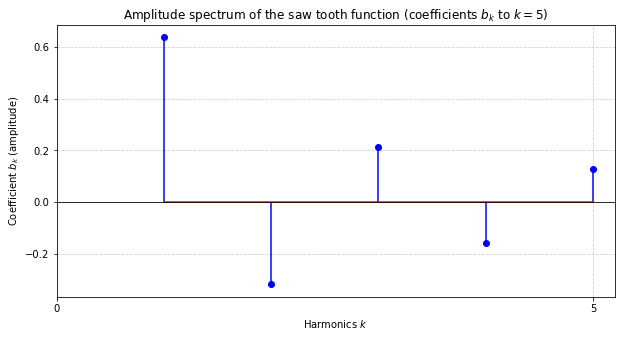

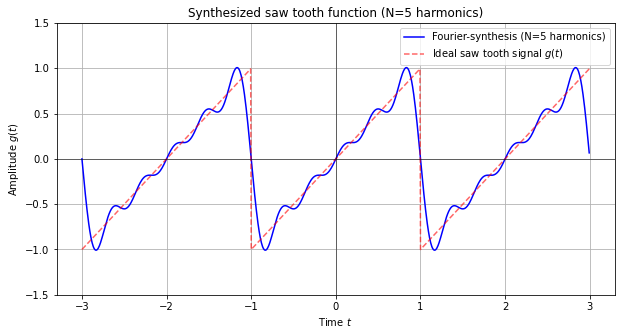

In [11]:
import matplotlib.pyplot as plt

T = 2.0         # Duration of the period (defined on [-1, 1])
N_harmonics = 5 # Amount of harmonics to include in the synthesis

# Calculate coefficients for the saw tooth function
a_coeffs, b_coeffs = sawtooth_coeffs_calculate(N_harmonics)

# Time axis [-3, 3]
time_vals = np.linspace(-3.0, 3.0, 900, endpoint=False)

ideal_signal = (time_vals + T/2) % T - T/2

# Synthesization of the sawtooth signal using the Fourier series coefficients
sawtooth_signal = fs_synthesize(time_vals, a_coeffs, b_coeffs, T)

# x-Axis values for plotting harmonics (not used in final plot)
k_values = np.arange(1, N_harmonics + 1)

b_k_values = b_coeffs[1:] 

plt.figure(figsize=(10, 5))

plt.stem(k_values, b_k_values, linefmt='b-', markerfmt='bo', basefmt='r-')

plt.title(f'Amplitude spectrum of the saw tooth function (coefficients $b_k$ to $k={N_harmonics}$)')
plt.xlabel('Harmonics $k$')
plt.ylabel('Coefficient $b_k$ (amplitude)')
plt.xticks(np.arange(0, N_harmonics + 1, 5)) # x-axis ticks at intervals of given N_harmonics
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8) # 0-Line

# --- 4. Plotting the saw tooth signal using Matplotlib ---
plt.figure(figsize=(10, 5))
plt.plot(time_vals, sawtooth_signal, label=f'Fourier-synthesis (N={N_harmonics} harmonics)', color='blue')

plt.plot(time_vals, ideal_signal, linestyle='--', color='red', alpha=0.6, label='Ideal saw tooth signal $g(t)$')




plt.title(f'Synthesized saw tooth function (N={N_harmonics} harmonics)')
plt.xlabel('Time $t$')
plt.ylabel('Amplitude $g(t)$')
plt.ylim(-1.5, 1.5)
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [12]:
def square_wave_coeffs_calculate(N: int) -> Tuple[np.ndarray, np.ndarray]:
    
    # The arrays have length N + 1 (for indices 0 to N)
    a_coeffs = np.zeros(N + 1)
    b_coeffs = np.zeros(N + 1)
    
    # 1. DC Component (k=0)
    # a_0 is set to 1.0 (offset), while b_0 is zero.
    a_coeffs[0] = 1.0  
    b_coeffs[0] = 0.0
    
    # 2. Harmonic coefficients (k=1 to N)
    for k in range(1, N + 1):
        
        # a_k calculation (representative of an even function)
        a_coeffs[k] = (2.0 / (k * np.pi)) * np.sin(np.pi * k / 2.0)
        
        # b_k = 0 (no sine components)
        b_coeffs[k] = 0
        
    return a_coeffs, b_coeffs


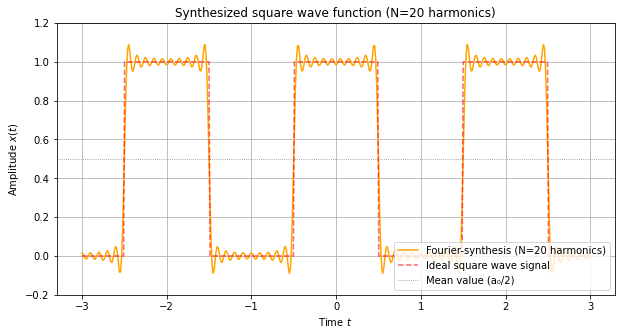

In [19]:
T = 2.0         
N_harmonics = 20

# Calculate coefficients
a_coeffs, b_coeffs = square_wave_coeffs_calculate(N_harmonics)

# Time axis in the range [-3, 3]
time_vals = np.linspace(-3.0, 3.0, 500, endpoint=False)

# Synthesize the signal
square_signal = fs_synthesize(time_vals, a_coeffs, b_coeffs, T)

# --- 4. Ideal square wave for reference ---
# The signal oscillates from 0 to 1, starting at t=-T/4 (for symmetric cosine representation)
ideal_square_signal = np.where(np.abs((time_vals + T/4) % T - T/4) <= T/4, 1.0, 0.0)

# --- 5. Plotting both functions ---
plt.figure(figsize=(10, 5))
plt.plot(time_vals, square_signal, label=f'Fourier-synthesis (N={N_harmonics} harmonics)', color='orange')
plt.plot(time_vals, ideal_square_signal, linestyle='--', color='red', alpha=0.6, label='Ideal square wave signal')

plt.title(f'Synthesized square wave function (N={N_harmonics} harmonics)')
plt.xlabel('Time $t$')
plt.ylabel('Amplitude $x(t)$')
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.axhline(0.5, color='gray', linestyle=':', linewidth=0.8, label='Mean value (a₀/2)')
plt.legend(loc='lower right')
plt.show()

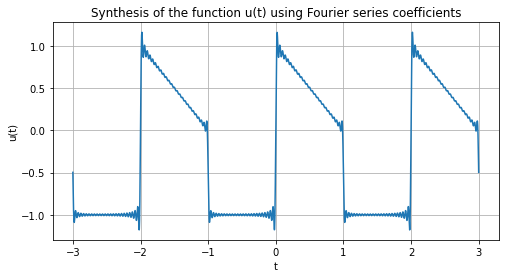

In [22]:
def u_coeffs(N):
    a = np.zeros(N)
    b = np.zeros(N)
    a[0] = -0.5
    for k in range(1, N):
        a[k] = -(np.cos(np.pi*k) - 1) / (k**2 * np.pi**2)
        b[k] = (2 - np.cos(np.pi*k)) / (k * np.pi)
    return a, b

# Plot
N = 50
a, b = u_coeffs(N)

t = np.linspace(-3, 3, 3000)
u_fourier = fs_synthesize(t, a, b, T=2)

plt.figure(figsize=(8,4))
plt.plot(t, u_fourier)
plt.title("Synthesis of the function u(t) using Fourier series coefficients")
plt.xlabel("t")
plt.ylabel("u(t)")
plt.grid(True)
plt.show()

In [ ]:
# Looking at the coefficients we can already deduct properties of function, particularly symmetry. Since sine is a point symmetric and the sawtooth function as well, we are only using sine waves to construct the function.
# For a simple sine wave with frequency 5 Hz, the period T is 0.2 seconds and the coefficients a_k are zero 
# while b_k is just non-zero for k=1 (fundamental frequency) and zero for all higher harmonics while b1 is just
# the amplitude of the sine wave.

2. Multiplication: 
$x_n \cdot \cos(\dots)$

The core of the operation is the multiplication:
$$x_n \cdot \cos\left(\frac{2\pi k n}{N}\right)$$
$x_n$: This is the amplitude of the incoming signal $n$.

$\cos(\dots)$: This is the amplitude of the cosine test wave with the frequency $k$ at given time $n$.

NOTE: You can only look at N different frequencies, N being the amount of samples.

In [3]:
import numpy as np

def dft(x):

    x = np.asarray(x, dtype=complex)
    N = len(x)
    
    # These are the indices n (0..N-1) and k (0..N-1)
    n = np.arange(N)
    k = n.reshape((N, 1)) # Spaltenvektor
    
    # This is the DFT matrix which when multiplied by the input vector x gives the DFT
    M = np.exp(-2j * np.pi * k * n / N)
    
    return np.dot(M, x)

def idft(X):
    """Vektorised inverse discrete Fourier transform"""
    X = np.asarray(X, dtype=complex)
    N = len(X)
    
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    
    M = np.exp(2j * np.pi * k * n / N)
    
    return np.dot(M, X) / N

In [34]:
# Test the DFT and IDFT functions
x = np.array([1, 2, 3, 4])

X = dft(x)
x_rec = idft(X)

#print("DFT X =", X)
print("Reconstructed =", x_rec)

np1 = np.fft.fft(x)
np2 = np.fft.ifft(np1)

# print("Numpy DFT: ", np1)
print("Numpy reconstructed: ", np2)

Reconstructed = [1.-5.55111512e-16j 2.-2.98739775e-16j 3.-1.14423775e-17j
 4.+2.66113379e-16j]
Numpy reconstructed:  [1.+0.j 2.+0.j 3.+0.j 4.+0.j]


In [ ]:
# Test sizes
import time
sizes = [2**j for j in [2, 4, 8, 16]]

print("N   \tDFT Measured time [s]\tFFT Measured time [s]")
print("-----------------------------------------")

for N in sizes:
    x = np.random.randn(N)

    # Measured time for DFT
    start = time.time()
    if N <= 16384: # otherwise your DFT takes too long
        X1 = dft(x)
        t_dft = time.time() - start
    else:
        t_dft = float('nan')  # too slow
       
    # Measured time of NumPy FFT
    start = time.time()
    X2 = np.fft.fft(x)
    t_fft = time.time() - start

    print(f"{N:<5}\t{t_dft:.6f}\t\t{t_fft:.6f}")

N   	DFT Measured time [s]	FFT Measured time [s]
-----------------------------------------
4    	0.000247		0.000051
16   	0.000103		0.000300
256  	0.005591		0.000094
65536	nan		0.003876


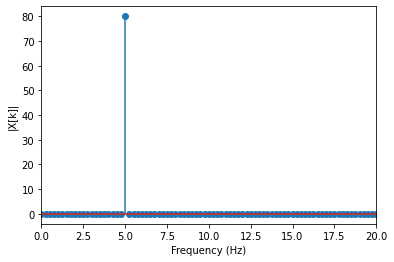

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Construct a simple sine wave signal
fs = 40        # Sampling frequency
f = 5          # Signal frequency
t = np.arange(-2, 2, 1/fs)  # time axis from -2s to 2s with sampling rate fs
x = np.sin(2*np.pi*f*t)    # Sine signal

# Function for frequency axis
def dftfreq(N, fs):
    return np.arange(N) * fs / N

# DFT calculate
X = dft(x)
N = len(X)
freqs = dftfreq(N, fs)

# Plot
plt.stem(freqs, np.abs(X))
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]|")
plt.xlim(0, fs/2)
plt.show()


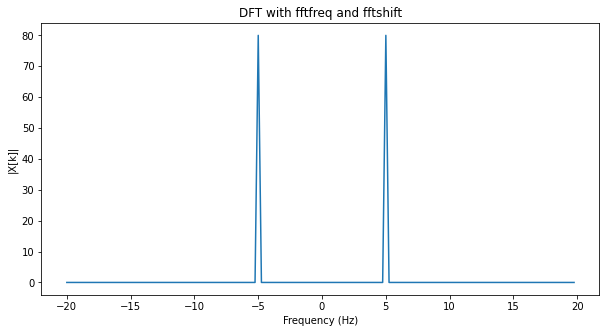

In [37]:
X = dft(x)
N = len(X)

# Frequency axis using numpy's fftfreq function
freqs = np.fft.fftfreq(N, d=1/fs)

# Plot: Frequencies and spectrum "centered" using fftshift
plt.figure(figsize=(10,5))
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(X)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]|")
plt.title("DFT with fftfreq and fftshift")
plt.show()

In [ ]:
# np.fft.fftshift() is a function in NumPy that shifts 
# the zero-frequency component to the center of the spectrum.
# The DFT of a signal typically has its zero-frequency component at the beginning of the array.

In [ ]:
# sin(ω t) = (1 / (2j)) * (exp(j ω t) − exp(−j ω t))

# Euler formulas:
# exp(jθ)  =  cos(θ) + j·sin(θ)  
# exp(−jθ) =  cos(θ) − j·sin(θ)

# subtracting these two equations gives:
# exp(jθ) − exp(−jθ)  
# = (cos(θ) + j sin(θ)) − (cos(θ) − j sin(θ))  
# = cos(θ) + j sin(θ) − cos(θ) + j sin(θ)  
# = 2 j sin(θ)

# resolving for sin(θ) gives:
# exp(jθ) − exp(−jθ) = 2 j sin(θ)

# dividing both sides by 2j gives:
# sin(θ) = (exp(jθ) − exp(−jθ)) / (2j)

# set θ = ω t:
# sin(ω t) = (exp(j ω t) − exp(−j ω t)) / (2j)

In [ ]:
# The two peaks in the DFT correspond to the positive and 
# negative frequency components of the sine wave.
# As shown the sine wave can be represented as a sum of
# two complex numbers with frequencies +f and -f.
# This can also be seen in the unit circle representation.


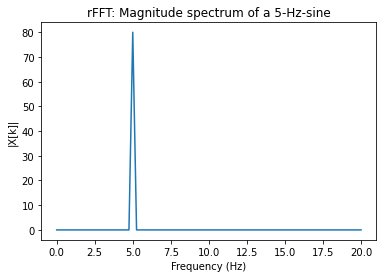

In [42]:
fs = 40
f = 5

t = np.arange(-2, 2, 1/fs)
x = np.sin(2*np.pi*f*t)

# rFFT
X = np.fft.rfft(x)
freqs = np.fft.rfftfreq(len(x), 1/fs)

plt.plot(freqs, np.abs(X))
plt.xlabel("Frequency (Hz)")
plt.ylabel("|X[k]|")
plt.title("rFFT: Magnitude spectrum of a 5-Hz-sine")
plt.show()

# we excpect to see 1 peak at 5 Hz in the rFFT magnitude plot, 
# since rFFT only computes the positive frequency components.

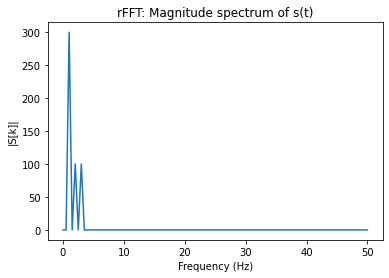

In [44]:
# s(t) = 3 cos(2π t) + sin(4π t) + cos(6π t)
# 3 cos(2π t) → 1 Hz  
# sin(4π t) → 2 Hz  
# cos(6π t) → 3 Hz  

# we excpect to see 3 peaks in the DFT magnitude plot at frequencies 1 Hz, 2 Hz, and 3 Hz.

fs = 100   # sampling rate
t = np.arange(0, 2, 1/fs)

s = 3*np.cos(2*np.pi*1*t) + np.sin(2*np.pi*2*t) + np.cos(2*np.pi*3*t)

S = np.fft.rfft(s)
freqs = np.fft.rfftfreq(len(s), 1/fs)

plt.plot(freqs, np.abs(S))
plt.xlabel("Frequency (Hz)")
plt.ylabel("|S[k]|")
plt.title("rFFT: Magnitude spectrum of s(t)")
plt.show()

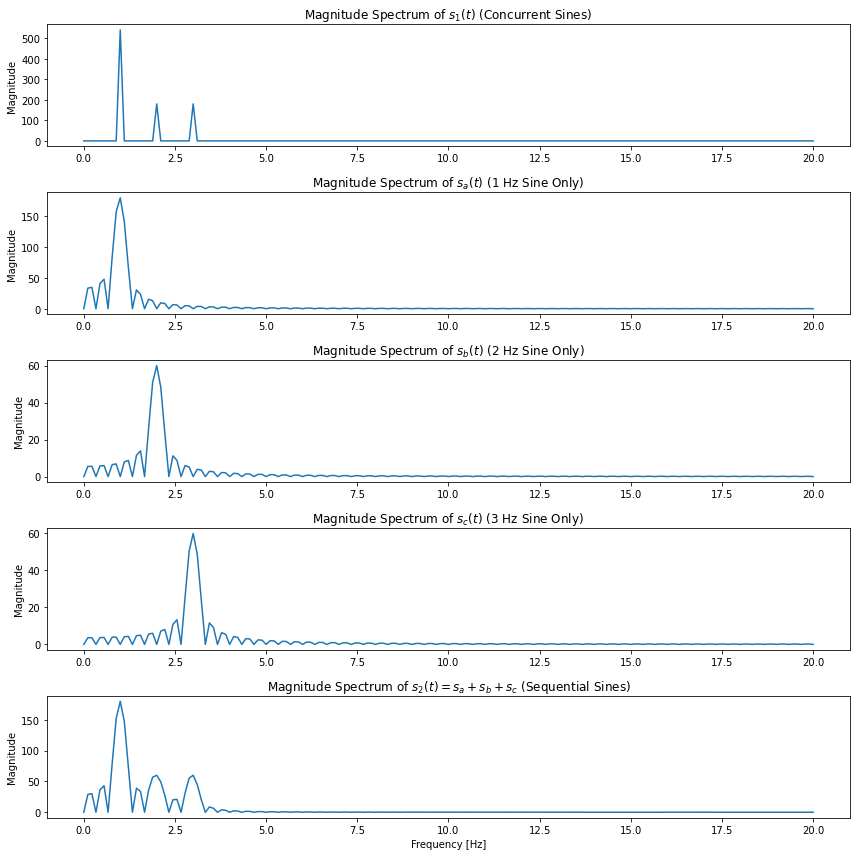

In [45]:
# --- Time base ---
fs = 40
t = np.arange(0, 9, 1/fs)

# --- Define signals ---
# s1: Concurrent superposition of three sine waves
s1 = 3*np.sin(2*np.pi*1*t) + np.sin(2*np.pi*2*t) + np.sin(2*np.pi*3*t)

# sa, sb, sc: Individual sine waves active in different time intervals
sa = np.zeros_like(t)
mask_a = (t >= 0) & (t < 3)
sa[mask_a] = 3*np.sin(2*np.pi*1*t[mask_a])

sb = np.zeros_like(t)
mask_b = (t >= 3) & (t < 6)
sb[mask_b] = np.sin(2*np.pi*2*t[mask_b])

sc = np.zeros_like(t)
mask_c = (t >= 6) & (t < 9)
sc[mask_c] = np.sin(2*np.pi*3*t[mask_c])

# s2: Sequential concatenation of the sine waves
s2 = sa + sb + sc

# --- rFFT: Positive frequencies only ---
def spectrum(x):
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(len(x), 1/fs)
    return freqs, np.abs(X)

f1, S1 = spectrum(s1)
fa, Sa = spectrum(sa)
fb, Sb = spectrum(sb)
fc, Sc = spectrum(sc)
f2, S2 = spectrum(s2)

# --- Plotting ---
plt.figure(figsize=(12,12))

# Subplot 1: All frequencies active at the same time
plt.subplot(5,1,1)
plt.plot(f1, S1)
plt.title("Magnitude Spectrum of $s_1(t)$ (Concurrent Sines)")
plt.ylabel("Magnitude")

# Subplot 2: Only 1 Hz component
plt.subplot(5,1,2)
plt.plot(fa, Sa)
plt.title("Magnitude Spectrum of $s_a(t)$ (1 Hz Sine Only)")
plt.ylabel("Magnitude")

# Subplot 3: Only 2 Hz component
plt.subplot(5,1,3)
plt.plot(fb, Sb)
plt.title("Magnitude Spectrum of $s_b(t)$ (2 Hz Sine Only)")
plt.ylabel("Magnitude")

# Subplot 4: Only 3 Hz component
plt.subplot(5,1,4)
plt.plot(fc, Sc)
plt.title("Magnitude Spectrum of $s_c(t)$ (3 Hz Sine Only)")
plt.ylabel("Magnitude")

# Subplot 5: Sequential segments
plt.subplot(5,1,5)
plt.plot(f2, S2)
plt.title("Magnitude Spectrum of $s_2(t) = s_a + s_b + s_c$ (Sequential Sines)")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")

plt.tight_layout()
plt.show()

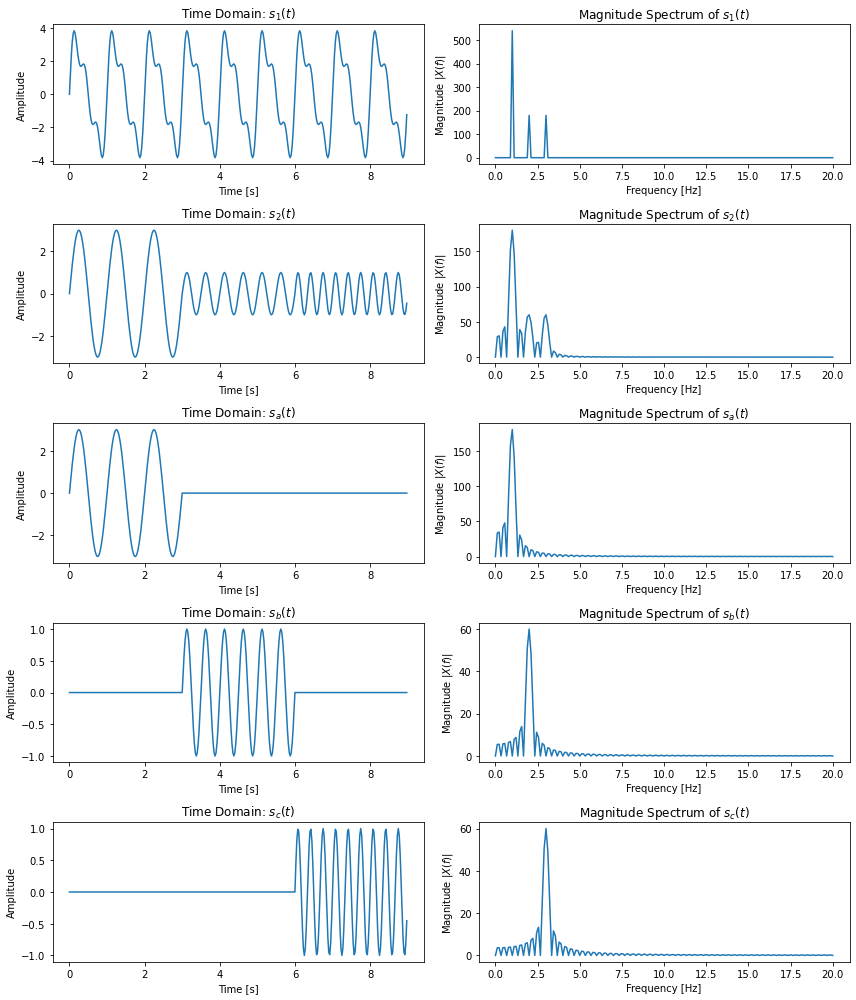

In [46]:
sig_list = [s1, s2, sa, sb, sc]
names = ["$s_1(t)$", "$s_2(t)$", "$s_a(t)$", "$s_b(t)$", "$s_c(t)$"]

# ---- Create Plot ----
plt.figure(figsize=(12, 14))

for i, (sig, name) in enumerate(zip(sig_list, names)):
    # Time Domain (Left Column)
    plt.subplot(5, 2, 2*i+1)
    plt.plot(t, sig)
    plt.title(f"Time Domain: {name}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")

    # Frequency Domain (Right Column)
    freqs, X = spectrum(sig)
    plt.subplot(5, 2, 2*i+2)
    plt.plot(freqs, X)
    plt.title(f"Magnitude Spectrum of {name}")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude $|X(f)|$")

plt.tight_layout()
plt.show()

In the graphic we can observe that both spectrums of $s_1(t)$ and $s_2(t)$ have peaks at the same frequencies , 1Hz, 2Hz and 3Hz. The spectrum for the concurrent signal $s_1(t)$ is far more well-defined since the different peaks don't spread into neigboring frequencies. This is not the case for the sequential signal $s_2$ where we can observe significant spectral leakage.
For $s_1$ the observation window only contains full periods for each frequency over the entire duration. This is the requirement to get an accurate result with the DFT and prevent spectral leakage.

In the time domain depiction of $s_2$, we can see that $s_2$ does not fulfill this requirement. It is a concetenation of segments, where each segment contains a different frequency. Each frequency is present for only 3 seconds and zero for the rest of the time ($s_a,s_b,s_c$). This cutting destroys the periodicity which is why the spectrum shows leakage although the signal contains the same frequencies as in $s_1$.

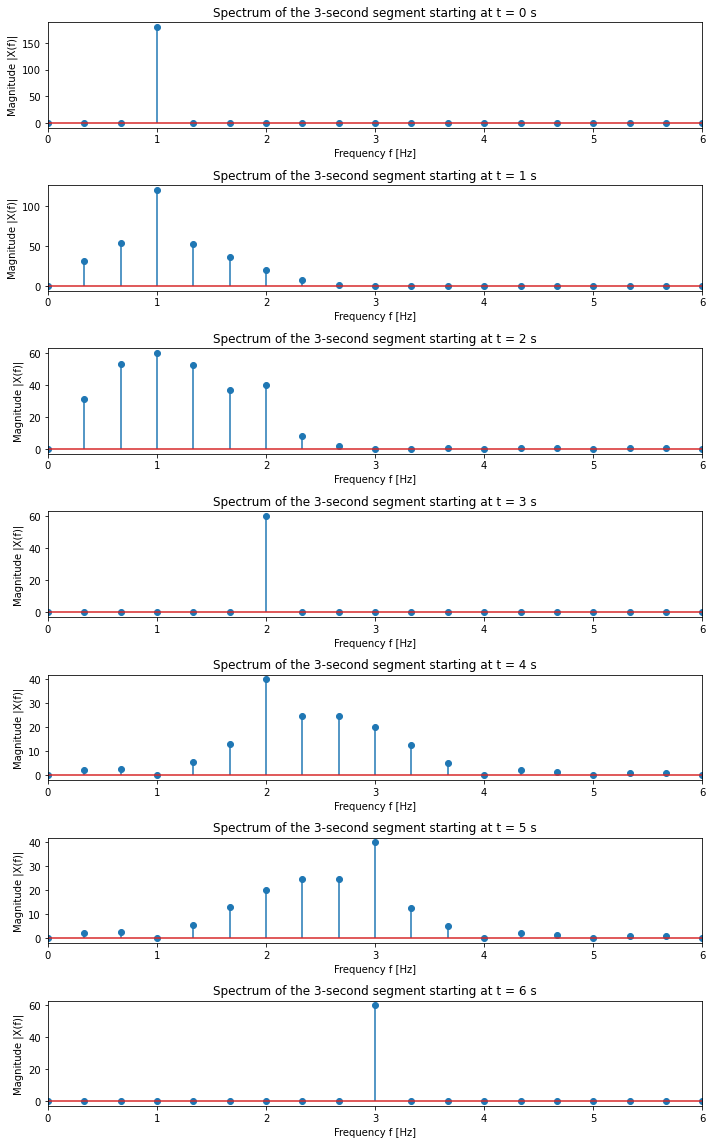

In [47]:
# Sampling parameters
fs = 40
T = 9
t = np.arange(0, T, 1/fs)

# Piecewise defined signal s2
sa = np.zeros_like(t)
sa[(t >= 0) & (t < 3)] = 3*np.sin(2*np.pi*1*t[(t >= 0) & (t < 3)])

sb = np.zeros_like(t)
sb[(t >= 3) & (t < 6)] = np.sin(2*np.pi*2*t[(t >= 3) & (t < 6)])

sc = np.zeros_like(t)
sc[(t >= 6) & (t < 9)] = np.sin(2*np.pi*3*t[(t >= 6) & (t < 9)])

s2 = sa + sb + sc

# Spectrum function
def magnitude_spectrum(x, fs):
    N = len(x)
    X = np.fft.fft(x)
    X = np.abs(X[:N//2])
    freqs = np.fft.fftfreq(N, 1/fs)[:N//2]
    return freqs, X

# Window length: 3 seconds
win_length = int(3 * fs)

# Start points: 0s, 1s, 2s, ..., 6s -> max. 3s window within range [0, 9]
starts = np.arange(0, 7, 1)  # in seconds

plt.figure(figsize=(10, 16))

for i, start in enumerate(starts):
    n0 = int(start * fs)
    n1 = n0 + win_length
    window = s2[n0:n1]

    freqs, X = magnitude_spectrum(window, fs)

    plt.subplot(len(starts), 1, i+1)
    plt.stem(freqs, X)
    # Plot labeling in English
    plt.title("Spectrum of the 3-second segment starting at t = {} s".format(start))
    plt.xlabel("Frequency f [Hz]")
    plt.ylabel("Magnitude |X(f)|")
    plt.xlim(0, 6)

plt.tight_layout()
plt.show()

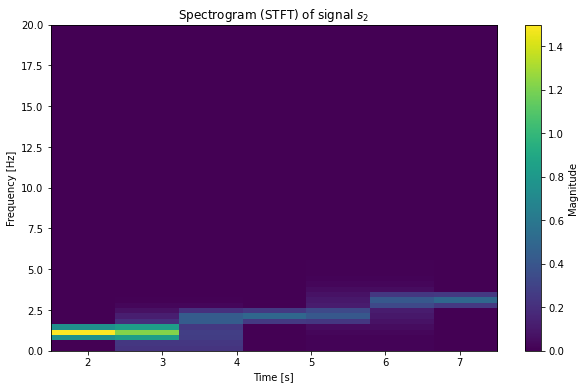

In [51]:
from scipy.signal import stft, get_window

# Sampling parameters
fs = 40
T = 9
t = np.arange(0, T, 1/fs)

# Construct piecewise signal s2 [cite: 143, 144, 145]
sa = np.zeros_like(t)
sa[(t >= 0) & (t < 3)] = 3*np.sin(2*np.pi*1*t[(t >= 0) & (t < 3)])

sb = np.zeros_like(t)
sb[(t >= 3) & (t < 6)] = np.sin(2*np.pi*2*t[(t >= 3) & (t < 6)])

sc = np.zeros_like(t)
sc[(t >= 6) & (t < 9)] = np.sin(2*np.pi*3*t[(t >= 6) & (t < 9)])

s2 = sa + sb + sc

# STFT parameters [cite: 167, 168, 169, 170]
segment_length = int(3 * fs)     # 3-second segment length [cite: 168]
overlap = int(2 * fs)            # 2-second overlap [cite: 169]
window = "hann"                  # Hann window [cite: 167]

# Perform Short-Time Fourier Transform (STFT) [cite: 160, 165]
f, t_stft, Zxx = stft(
    s2,
    fs=fs,
    window=window,
    nperseg=segment_length,
    noverlap=overlap,
    padded=False,               # No padding [cite: 170]
    boundary=None
)

# Magnitude spectrum
magnitude = np.abs(Zxx)

plt.figure(figsize=(10, 6))
# Visualize the STFT data matrix [cite: 171]
plt.imshow(
    magnitude,
    origin="lower",              # Frequency axis ascending from bottom to top 
    aspect="auto",              # Improve readability 
    extent=[t_stft[0], t_stft[-1], f[0], f[-1]] # Set correct axis dimensions 
)

plt.colorbar(label="Magnitude")
plt.xlabel("Time [s]")           # Time axis label
plt.ylabel("Frequency [Hz]")    # Frequency axis label
plt.title("Spectrogram (STFT) of signal $s_2$")
plt.show()

The x-axis depicts the time in seconds and the y-axis the frequencies that are present in the signal. The color (intensity) shows the magnitude for a certain frequency at a given time. A bright area represents a a higher magnitude whereas a dark area represents a low magnitude. 

In this specific spectrogram we can observe that the dominant frequency changes over time starting with 1HZ, proceeding to 2Hz and then finally 3Hz. Also the one 1Hz frequency at the beginning has a higher magnitude.
This corresponds exactly to the time domain of our signal $s_2$, where $s_a$ has an amplitude of 3, while $s_b$ and $s_c$ have an amplitude of 1.

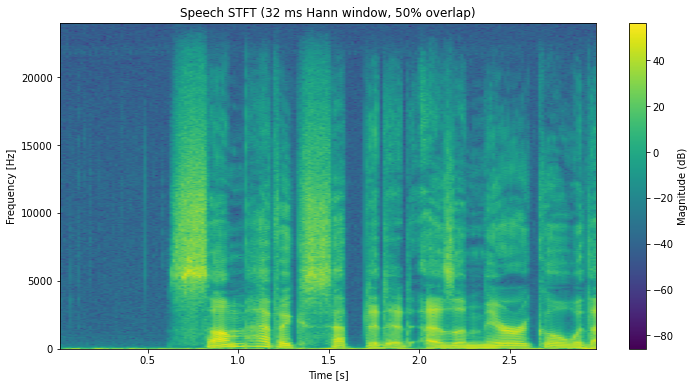

In [52]:
from scipy.io import wavfile
from scipy.signal import stft
import numpy as np
import matplotlib.pyplot as plt

# Load your audio file (adjust filename if needed)
fs, audio = wavfile.read("00252_4.9dB_PCM16.wav")

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio.mean(axis=1)

# Select the first 2–3 seconds for plotting
duration = 3   # seconds
audio_cut = audio[:int(fs*duration)]

# Parameters
segment_length = int(0.032 * fs)   # 32 ms
overlap = segment_length // 2      # 50% overlap
window = "hann"

# Compute STFT
f, t_stft, Zxx = stft(
    audio_cut, 
    fs=fs, 
    nperseg=segment_length,
    noverlap=overlap,
    window=window,
    padded=False,
    boundary=None
)

magnitude = np.abs(Zxx)

# Plot spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(
    20*np.log10(magnitude + 1e-12),
    origin="lower",
    aspect="auto",
    extent=[t_stft[0], t_stft[-1], f[0], f[-1]]
)
plt.colorbar(label="Magnitude (dB)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.title("Speech STFT (32 ms Hann window, 50% overlap)")
plt.show()